<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [2]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

ANSWER : 
No, the data is not balanced. One reason being, the given data is already preprocessed. Therefore it is not possible to create an accurate analysis. The other reason being, by looking at the session features in the code below we can say that a lot of people window shop. 

In [42]:
for col in ['NumOfEventsInJourney', 'NumSessions','interactionTime','NumCart', 'NumView',\
           'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove','EarlyMorning', 'Evening', 'Morning', 'Night']:
    print(col, '\n')
    print(past.groupby('Purchased?')[col].mean())
    print(10*'---')

NumOfEventsInJourney 

Purchased?
0    1.872303
1    2.101440
Name: NumOfEventsInJourney, dtype: float64
------------------------------
NumSessions 

Purchased?
0    1.287649
1    1.402259
Name: NumSessions, dtype: float64
------------------------------
interactionTime 

Purchased?
0    212101.185942
1    319495.639610
Name: interactionTime, dtype: float64
------------------------------
NumCart 

Purchased?
0    0.513844
1    0.595602
Name: NumCart, dtype: float64
------------------------------
NumView 

Purchased?
0    0.880742
1    0.918394
Name: NumView, dtype: float64
------------------------------
NumRemove 

Purchased?
0    0.389842
1    0.458922
Name: NumRemove, dtype: float64
------------------------------
InsessionCart 

Purchased?
0    24.651499
1    19.877436
Name: InsessionCart, dtype: float64
------------------------------
InsessionView 

Purchased?
0    15.644532
1    15.274447
Name: InsessionView, dtype: float64
------------------------------
InsessionRemove 

Purchased?

In [3]:
# YOUR CODE HERE
past[past['Purchased?']==1]['Purchased?'].value_counts().iloc[0]/len(past)

### use the mean here : 

#p

0.3438

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [4]:
# YOUR CODE HERE
# YOUR CODE HERE

X = past.drop(columns=['product_id', 'user_id'])# YOUR CODE HERE
y = X.pop('Purchased?')

In [5]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [40]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5, whiten=True, random_state=42)
X_reduced = pca.fit_transform(X_scaled)


In [41]:
X_reduced

array([[ 0.31737321, -0.95302795,  0.78873959,  0.05452146,  0.26629586],
       [ 0.24157934,  0.00887822, -0.46597317, -0.04733608,  0.66432921],
       [-0.08742563, -0.65321287, -0.27980591, -0.33321059, -0.85210295],
       ...,
       [ 1.15897071, -1.3363618 , -0.73542136, -0.56801063,  1.01934914],
       [ 1.33850678, -1.10068387, -0.76131078,  0.19299725,  2.09589083],
       [-1.32092306,  0.19644611,  0.11462334, -0.30426123,  0.71137872]])

In [8]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [9]:


print('the percentage of variance explained by each of the selected components:\n',pca.explained_variance_ratio_)

the percentage of variance explained by each of the selected components:
 [0.10281916 0.09445882 0.06506113 0.05100071 0.04255629]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [10]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [11]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

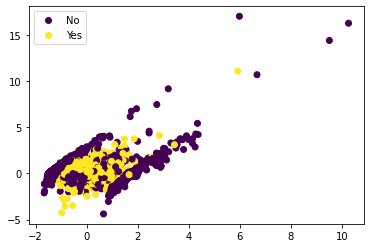

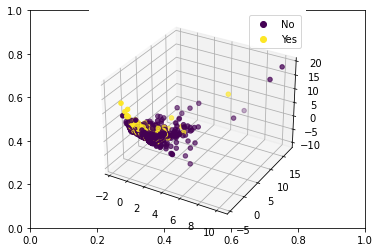

In [12]:
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [15]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if standardize:
        pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(class_weight='balanced'))])
    else:
        pipe = Pipeline([('lr', LogisticRegression(class_weight='balanced'))])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))


Now apply the pipeline on the all the features `X` and review the performance

In [16]:
train(X,y)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

ANSWER : 
No, because it's already been scaled.

In [17]:
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.49      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [18]:
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [23]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        inertias.append(KMeans(n_clusters=k, random_state=10).fit(X).inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

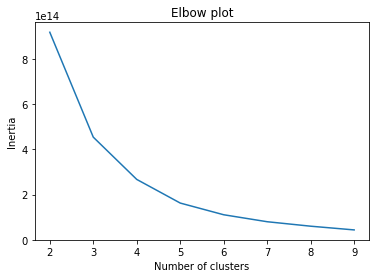

In [25]:
# YOUR CODE HERE
visualize_elbow(X,list(range(2,10)))

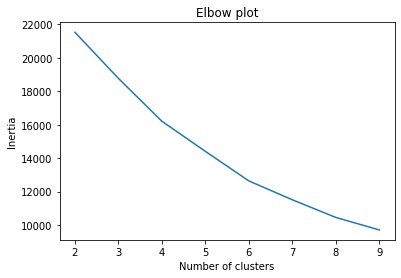

In [26]:
visualize_elbow(X_reduced,list(range(2,10)))

4. What are the disadvantage to use the Elbow method? 

   ANSWER : 
   
   One - it's hard to find a good value of k since there is no elbow in the plot above. Second - even if there is    an elbow, we mithg miss a cluster if we choose a smaller k value. 
   
   Reference : https://medium.com/geekculture/stop-using-the-elbow-method-96bcfbbbe9fd

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [27]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.20000076688620091
For n_clusters = 3 The average silhouette_score is : 0.21024389546644626
For n_clusters = 4 The average silhouette_score is : 0.21948064643365223
For n_clusters = 5 The average silhouette_score is : 0.22511944439172157
For n_clusters = 6 The average silhouette_score is : 0.21140126806769485
For n_clusters = 7 The average silhouette_score is : 0.21261668185265517
For n_clusters = 8 The average silhouette_score is : 0.2208079267814784


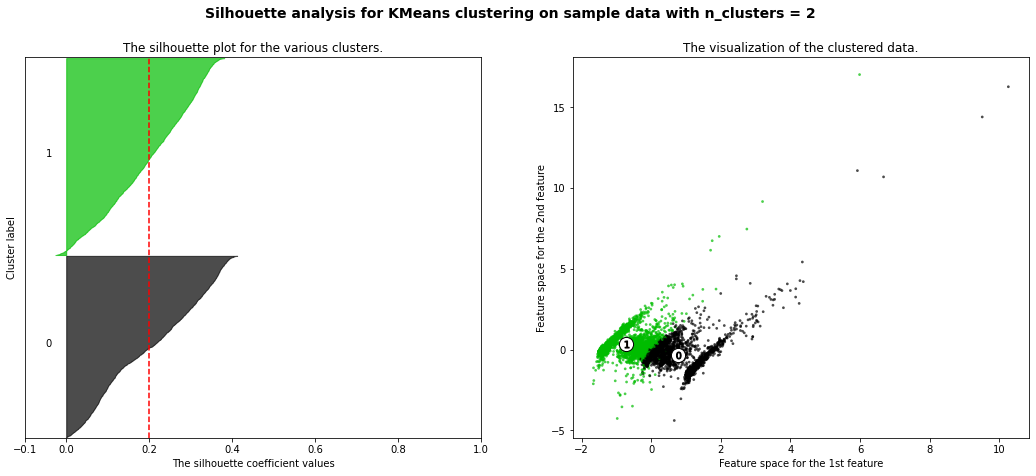

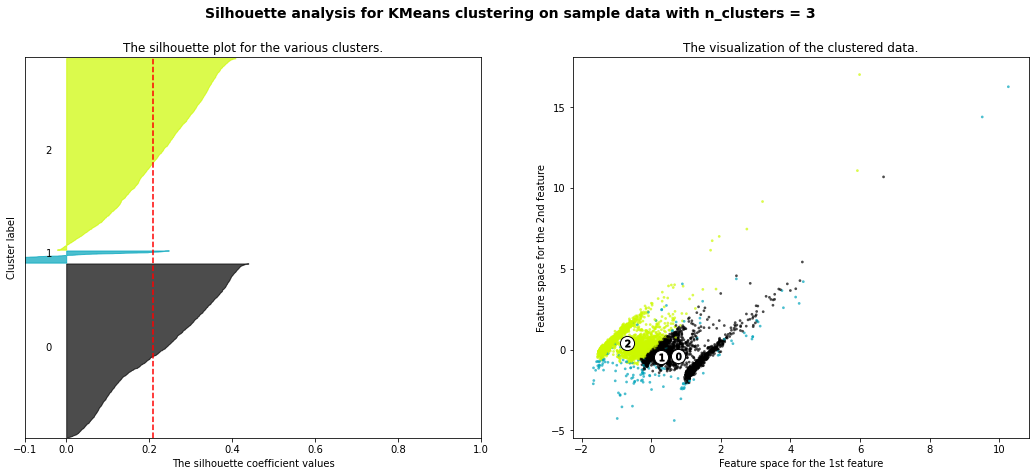

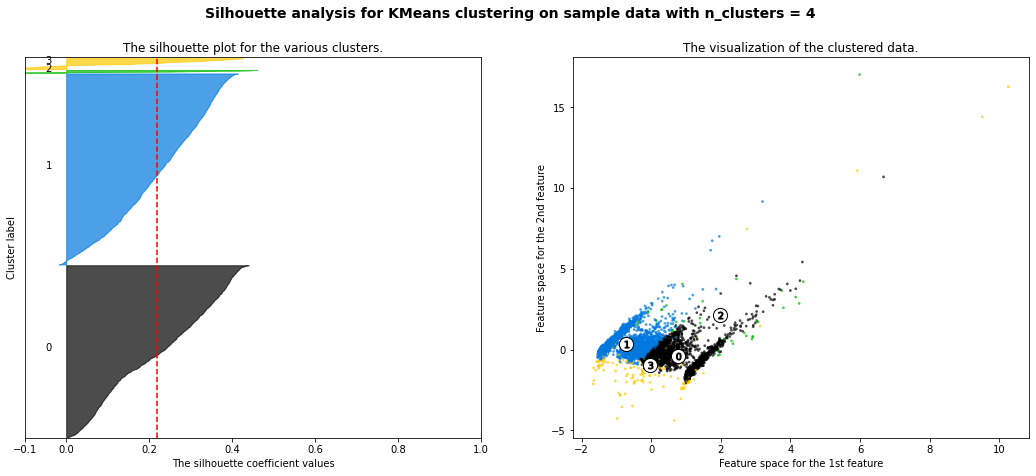

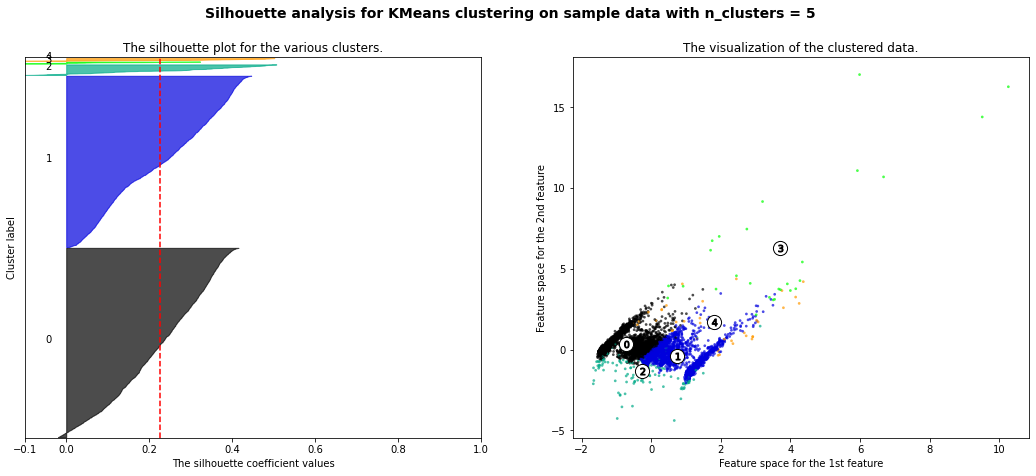

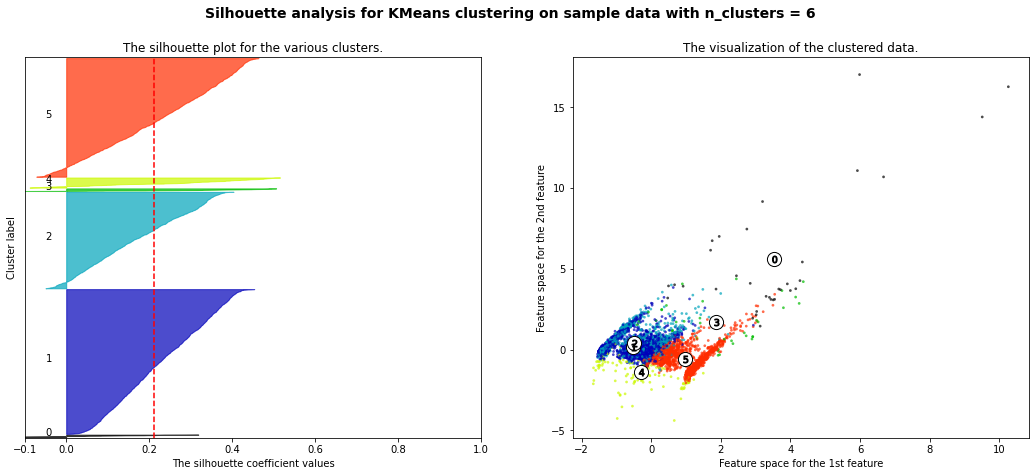

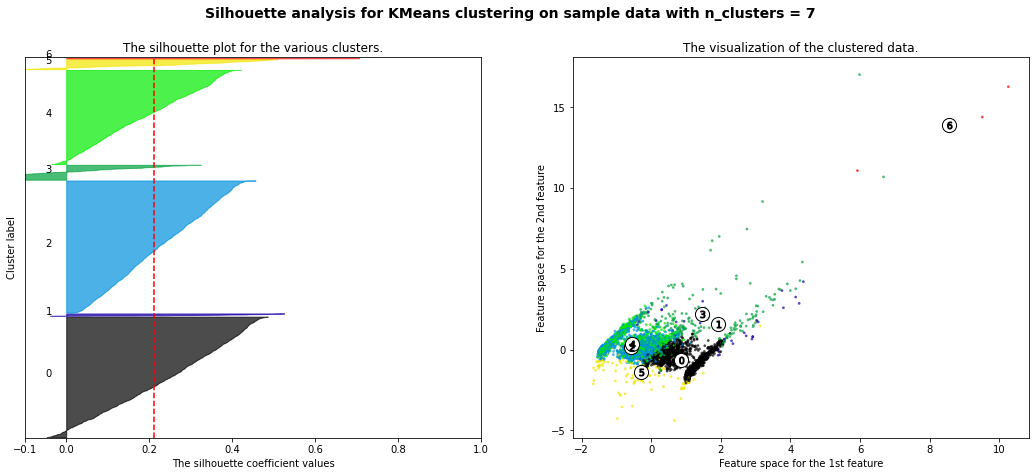

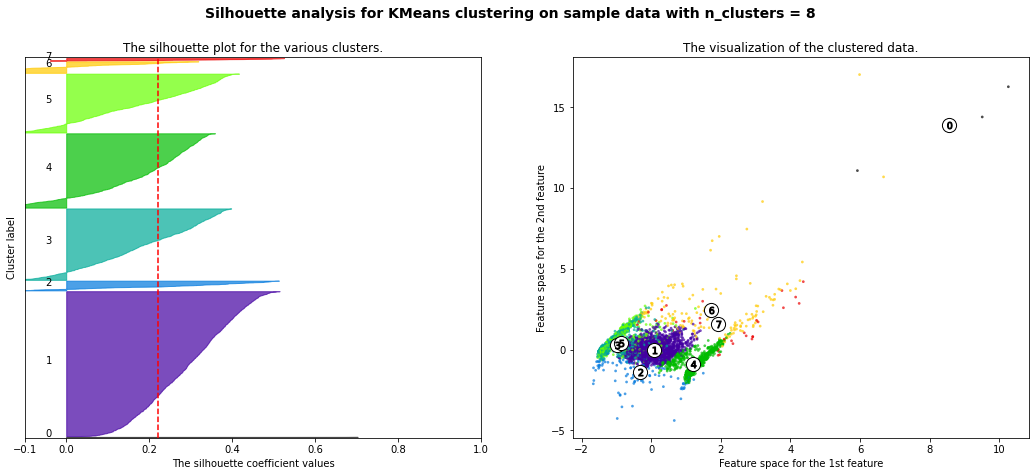

In [32]:
# YOUR CODE HERE
visualize_silhouette(max_clusters=8, X=X_reduced, random_state=10)

ANSWER : 

1. We don't want scores less than the average silhouette score.
2. We don't want negative scores as they mean that the sample was assigned to the wrong cluster
3. Scores near 0 indicate overlapping clusters (close to the decision boundary)

Given the above, the silhouette scores above are not very high. Silhouette scores of near 1 indicate dense clusters and these scores are just around 0.22. Therefore Cluster 5 is a better option.



6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [33]:

km = KMeans(n_clusters=5, random_state=10)
km.fit(X_reduced)


KMeans(n_clusters=5, random_state=10)

7. What is the size of each cluster? 

In [48]:
cluster_size = pd.DataFrame(km.labels_, columns=['cluster']).value_counts().reset_index().rename(columns={0:'size'})
cluster_size

,cluster,size
0,0,2517
1,1,2278
2,2,141
3,4,37
4,3,27


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [37]:
past['cluster_pca'] = km.predict(X_reduced)
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,1
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,1
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,1
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,1
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,0


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [45]:
grouped_purchase.agg(
    sum_maxPrice=('maxPrice', 'sum'), mean_maxPrice=('maxPrice', 'mean'))

,sum_maxPrice,mean_maxPrice
cluster_pca,,
0,4417.536060,4.908373
1,4204.678726,5.561744
2,4118.583667,71.010063
3,6.090857,2.030286
4,5.450000,2.725000


In [46]:
grouped_purchase.agg(
    sum_minPrice=('minPrice', 'sum'), mean_minPrice=('minPrice', 'mean'))

,sum_minPrice,mean_minPrice
cluster_pca,,
0,4399.054523,4.887838
1,4188.237859,5.539997
2,4114.021136,70.931399
3,5.770571,1.923524
4,5.186667,2.593333


In [52]:
grouped_purchase = past[past['Purchased?']==1].groupby('cluster_pca')
cluster_size['%']=  cluster_size['size']/cluster_size['size'].sum()
print(cluster_size)
print('\n% of customers who made a purchase by cluster: ')
past.groupby('cluster_pca')['Purchased?'].mean()

   cluster  size       %
0        0  2517  0.5034
1        1  2278  0.4556
2        2   141  0.0282
3        4    37  0.0074
4        3    27  0.0054

% of customers who made a purchase by cluster: 


cluster_pca
0    0.357569
1    0.331870
2    0.411348
3    0.111111
4    0.054054
Name: Purchased?, dtype: float64

   ANSWER : 
   
   - Clusters 0 and 1 look similar 
   - Cluster 4 is the least valuable cluster since it has less than 1% of total customers with the least percentile perchase (5.4%)
   - Cluster 2 is the most valuable cluster since it has 141 customers ( 2.8%) but has the the highest 5 of customer purchase ( 41%)

In [57]:
def plot_hist(col, split=True):
    # if split is True, histogram will be plot by purchase
    grouped =  past.groupby('cluster_pca')
    fig, axs = plt.subplots(1, 5)
    fig.set_size_inches(18, 5)
    for cluster, group in grouped:
        if split:
            pivot = group.pivot(columns='Purchased?', values=col)
            axs[cluster].hist(pivot,color = ['r','g'])
            axs[cluster].legend(pivot.columns, title=pivot.columns.name)
        else:
            axs[cluster].hist(group[col])
        axs[cluster].set_title('cluster {} '.format(cluster))
        axs[cluster].set_xlabel(col)
    plt.show()

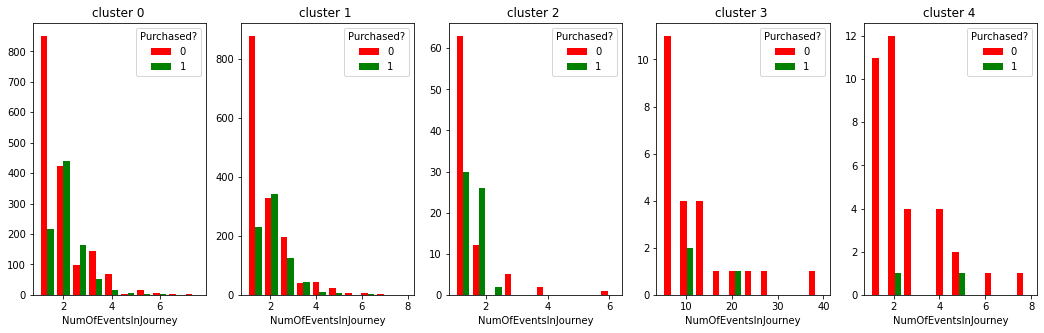

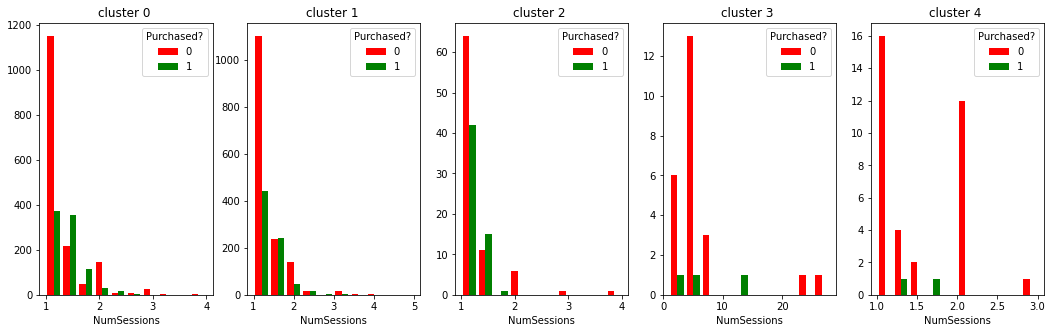

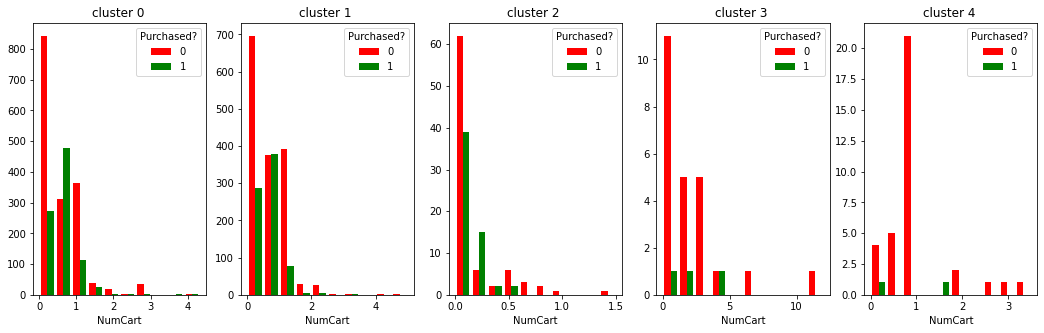

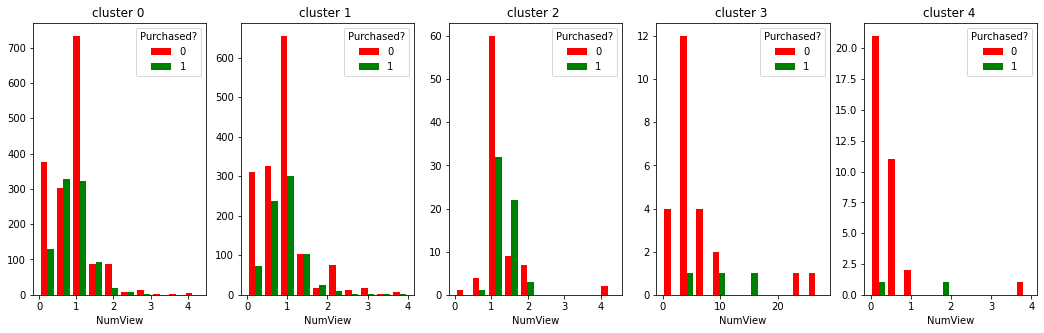

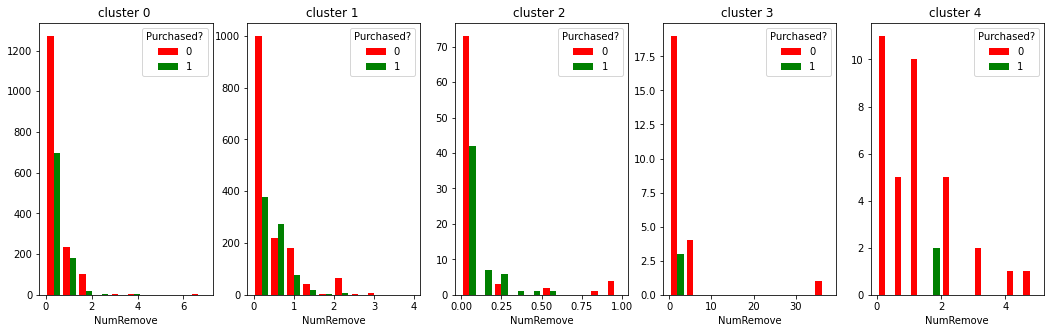

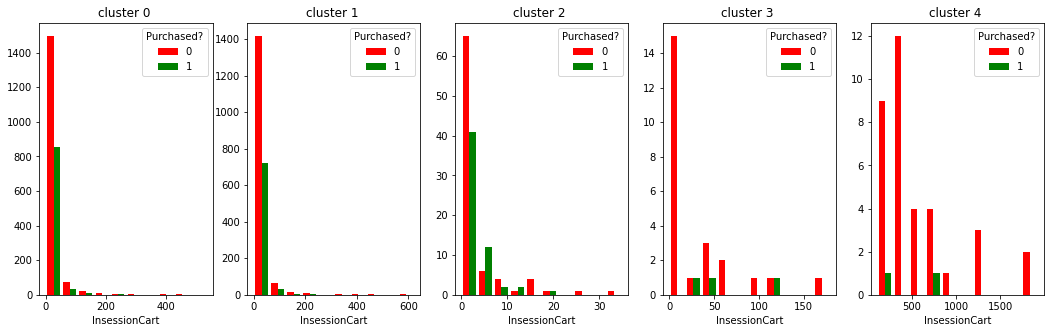

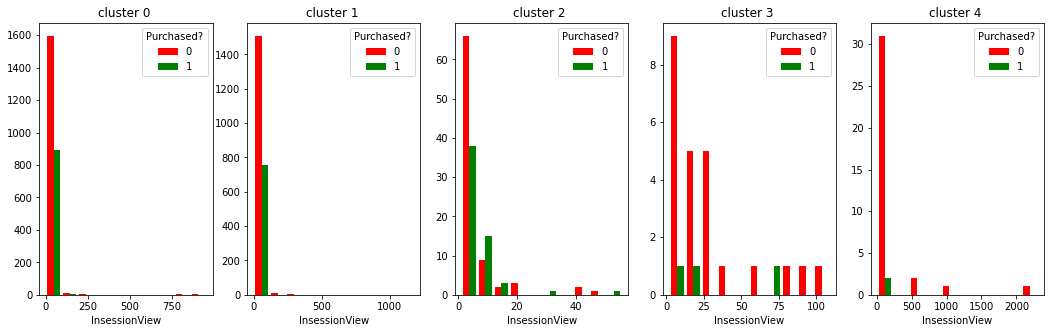

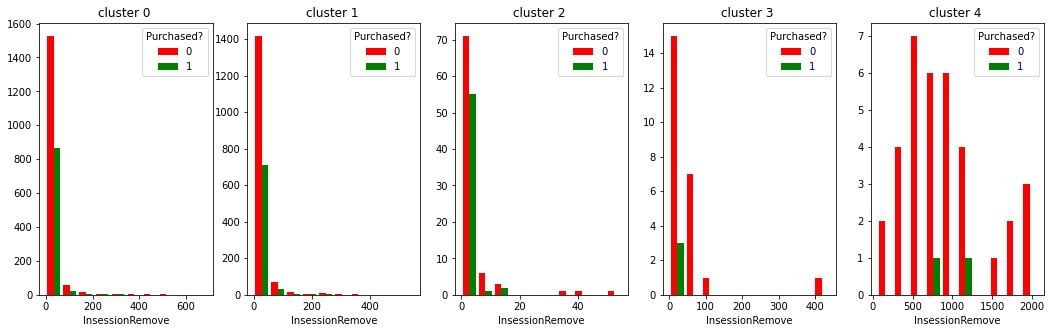

In [58]:
for col in ['NumOfEventsInJourney', 'NumSessions', 'NumCart', 'NumView'
            ,'NumRemove','InsessionCart','InsessionView', 'InsessionRemove']:       
    plot_hist(col)

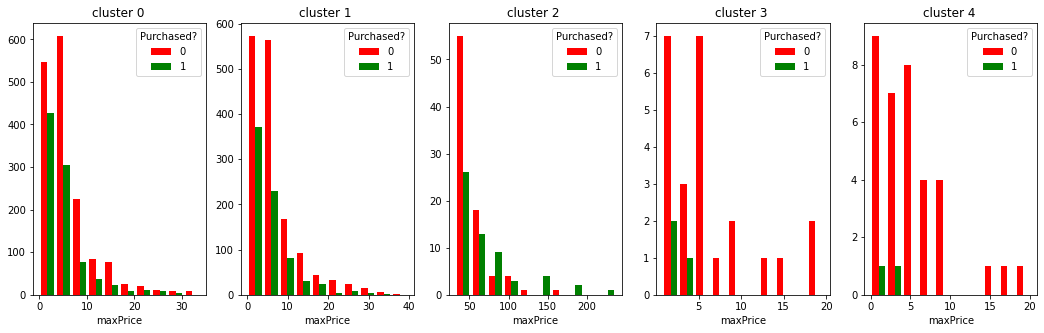

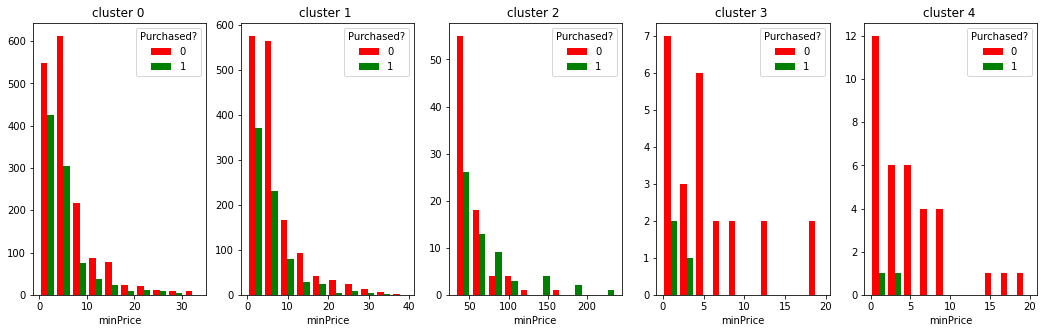

In [59]:
for col in ['maxPrice','minPrice']:       
    plot_hist(col)

- Cluster 4 has the highest "InsessionRemove"
- Clusters 0 and 1 are similar 
- Cluster 2 has higher value customers
- Cluster 2 has has the lowest "InsessionView" 

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

ANSWER : 

k-means assume the variance of the distribution of each attribute (variable) is spherical; all variables have the same variance; the prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations; If any one of these 3 assumptions is violated, then k-means will fail.

Logically speaking, the drawbacks of K-means are : needs linear separability of the clusters. need to specify the number of clusters. Algorithmics : Loyds procedure does not converge to the true global maximum even with a good initialization when there are many points or dimensions.

k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you need to generalize k-means as described in the Advantages section. Clustering outliers. Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored.

References : 
1. http://varianceexplained.org/r/kmeans-free-lunch/
2. https://stats.stackexchange.com/questions/576812/what-are-the-k-means-algorithm-assumptions


    *YOUR ANSWER HERE*

In [60]:
from sklearn.cluster import SpectralClustering
import numpy as np
spectral_clustering = SpectralClustering(n_clusters=4,
                                assign_labels='discretize',
                                random_state=0).fit(X_reduced)

spectral_y_labels = spectral_clustering.labels_
spectral_clusters_size = pd.DataFrame(spectral_y_labels, 
                                      columns=['cluster']).value_counts().\
                                      reset_index().rename(columns={0:'size'})
spectral_clusters_size

,cluster,size
0,0,4986
1,1,13
2,2,1


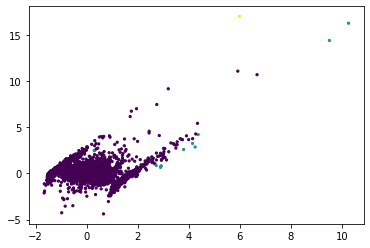

In [61]:
def plot_spectral(X, cluster_labels):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], s=5, c=cluster_labels)
    plt.show() 
plot_spectral(X_reduced,spectral_y_labels) 

11. Jot down recommendations or followup steps, detailing the reasons.

ANSWER : 

- Cluster 2 is the least valuable so no need to spend much time on these customers
- Clusters 0, 1 are similar; these are the majority of the customers and have average spending


    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [62]:
new = pd.read_csv('../dat/new.csv.gz')

In [63]:
assert new.shape == (30091, 5)

In [64]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

ANSWER : 

The new dataset has ~6 times more samples than the past dataset but it only has 5 columns (4 features) which are  ['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category']

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [65]:
np.intersect1d(new['product_id'], past['product_id'])

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [66]:
# YOUR CODE HERE # ~.344
new[new['Purchased?']==1]['Purchased?'].value_counts().iloc[0]/len(new)

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [67]:
# YOUR CODE HERE
X_train = past[new.columns].drop(['product_id', 'Purchased?'], axis=1).to_numpy()
y_train = y.to_numpy()
X_test = new.drop(['product_id'], axis=1)
y_test = X_test.pop('Purchased?')
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [68]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [69]:
# YOUR CODE HERE
def train(X_train,X_test, y_train, y_test, standardize = True) -> None:
    if standardize:
        pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(class_weight='balanced'))])
    else:
        pipe = Pipeline([('lr', LogisticRegression(class_weight='balanced'))])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    
train(X_train,X_test, y_train, y_test, standardize=True)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [70]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)

In [71]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [72]:
# YOUR CODE HERE
y = np.concatenate((y_train, np.full(y_test.shape, -1)))

In [73]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [74]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_prop_model.fit(X,y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [75]:
semi_sup_preds = label_prop_model.transduction_[y_train.shape[0]:] # YOUR CODE HERE

In [76]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [77]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)